# Movie Listing From 2006 to 2016

Summary

Our purpose is to see which areas within the dataset affected the revenue and rating score. We look at a variety of variables within the dataset to see which areas affected the revenue and ratings. We look at several variables like Votes, Metascore, Ratings, Genre, and etc. to determine how the revenue was effected.

We used several graphical visualizations to analyze which areas from the dataset afftected the revenue or certain areas which could of affected the movies revenue.

Data Description

We used the orginal dataset from Kaggel and modified the columns to seperate the combined values. Below is the updated dataset columns.

    1. Rank: Rank of the movie
    2. Title: Name of the Movie
    3. Genre 1: Type of genre the movie is in
    4. Director: Displays the name of the director for the movie
    5. Actor 1: first actors name
    6. Actor 2: second actors name
    7. Actor 3: third actors name
    8. Actor 4: fourth actors name
    9. Year: year of the movie released
    10.Runtime(minutes): total time of the movie
    11.Rating: overall rating of the movie
    12.Votes: total amount of votes for the movie
    13.Revenue: overall revenue for each movie
    14.Metascore: a rating from critics

Data Reading

We started to import a list of libraries such as pandas, numpy, seaborn, matplotlib and warnings. We utilized pandas for a variety of data manipulations such as merging, reshaping, selecting, data cleaning, and data wrangling. We utilized numpy to perform mathematical operations on arrays. Matplotlib was used for data visualizations, graphical plotting library for Python, and warning to filter any warnings while visual parts being generated. We also read csv file using the read_csv().

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
import warnings as w
from matplotlib.pyplot import figure
%matplotlib inline

s=pd.read_csv('movier.csv')
s=s[0:1000]
s

,Rank,Title,Genre,Director,Actor 1,Actor 2,Actor 3,Actor 4,Year,Runtime,Rating,Votes,Revenue,Metascore
0,1,Guardians of the Galaxy,Action,James Gunn,Chris Pratt,Vin Diesel,Bradley Cooper,Zoe Saldana,2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,Adventure,Ridley Scott,Noomi Rapace,Logan Marshall-Green,Michael Fassbender,Charlize Theron,2012,124,7.0,485820,126.46,65.0
2,3,Split,Horror,M. Night Shyamalan,James McAvoy,Anya Taylor-Joy,Haley Lu Richardson,Jessica Sula,2016,117,7.3,157606,138.12,NaN
3,4,Sing,Animation,Christophe Lourdelet,Matthew McConaughey,Reese Witherspoon,Seth MacFarlane,Scarlett Johansson,2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,Action,David Ayer,Will Smith,Jared Leto,Margot Robbie,Viola Davis,2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,Crime,Billy Ray,Chiwetel Ejiofor,Nicole Kidman,Julia Roberts,Dean Norris,2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Eli Roth,Lauren German,Heather Matarazzo,Bijou Phillips,Roger Bart,2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,Drama,Jon M. Chu,Robert Hoffman,Briana Evigan,Cassie Ventura,Adam G. Sevani,2008,98,6.2,70699,58.01,50.0
998,999,Search Party,Adventure,Scot Armstrong,Adam Pally,T.J. Miller,Thomas Middleditch,Shannon Woodward,2014,93,5.6,4881,NaN,22.0


Data Cleaning

Data cleaning is the process of identifying and correcting corrupt, incomplete, duplicated, incorrect, and irrelevant data from a reference set, table, or database. Data issues typically arise through user entry erros, incomplete data capture, non-standard formats, and data integration issues.

Dealing with missing data or value is tricky but are common parts of the data cleaning process. Many models can live with other problems of the data, most models do not accept missing data. We used a heatmap to visualize the missing data.

<AxesSubplot:>

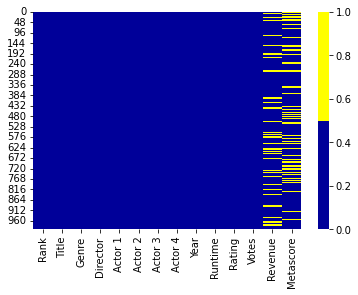

In [41]:
cols = s.columns[:1000] 
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(s[cols].isnull(), cmap=sns.color_palette(colours))

Below shows the total information of the dataset such as how many columns are non-null values and the data type for each column.

In [42]:
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Rank       1000 non-null   int64  
 1   Title      1000 non-null   object 
 2   Genre      1000 non-null   object 
 3   Director   1000 non-null   object 
 4   Actor 1    1000 non-null   object 
 5   Actor 2    1000 non-null   object 
 6   Actor 3    1000 non-null   object 
 7   Actor 4    999 non-null    object 
 8   Year       1000 non-null   int64  
 9   Runtime    1000 non-null   int64  
 10  Rating     1000 non-null   float64
 11  Votes      1000 non-null   int64  
 12  Revenue    850 non-null    float64
 13  Metascore  793 non-null    float64
dtypes: float64(3), int64(4), object(7)
memory usage: 109.5+ KB


In [43]:
s.isna().sum()

Rank           0
Title          0
Genre          0
Director       0
Actor 1        0
Actor 2        0
Actor 3        0
Actor 4        1
Year           0
Runtime        0
Rating         0
Votes          0
Revenue      150
Metascore    207
dtype: int64

isnull() functions detects missing values. It returns the total amount of missing values from each columns.

In [5]:
s.isnull().sum()

Rank           0
Title          0
Genre          0
Director       0
Actor 1        0
Actor 2        0
Actor 3        0
Actor 4        1
Year           0
Runtime        0
Rating         0
Votes          0
Revenue      150
Metascore    207
dtype: int64

In [6]:
print(s.columns)

Index(['Rank', 'Title', 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3',
       'Actor 4', 'Year', 'Runtime', 'Rating', 'Votes', 'Revenue',
       'Metascore'],
      dtype='object')


Data Cleaning 

We took the mean value of Revenue and median value of Metascore for the missing values. When inplace = True, the data is modified which will return nothing and the dataframe is updated. When inplace=False, the operation is performed and returns a copy of the object. 

In [7]:
cols = ['Metascore']
for column in cols:
    s[column].fillna(s[column].median(),inplace=True)

In [8]:
cols = ['Revenue']
for column in cols:
    s[column].fillna(s[column].mean(),inplace=True)

We can see below that the amount missing values of Revenue and Metascore has been changed to zero.

In [9]:
s.isna().sum()

Rank         0
Title        0
Genre        0
Director     0
Actor 1      0
Actor 2      0
Actor 3      0
Actor 4      1
Year         0
Runtime      0
Rating       0
Votes        0
Revenue      0
Metascore    0
dtype: int64

In [10]:
s.isnull().sum()

Rank         0
Title        0
Genre        0
Director     0
Actor 1      0
Actor 2      0
Actor 3      0
Actor 4      1
Year         0
Runtime      0
Rating       0
Votes        0
Revenue      0
Metascore    0
dtype: int64

We also replaced the missing value within Actor 4 with 'unknown'

In [11]:
s['Actor 4'] = s['Actor 4'].replace(np.nan, 'Unknown')

In [12]:
s.isnull().sum()

Rank         0
Title        0
Genre        0
Director     0
Actor 1      0
Actor 2      0
Actor 3      0
Actor 4      0
Year         0
Runtime      0
Rating       0
Votes        0
Revenue      0
Metascore    0
dtype: int64

Display of the dataset after replacing the missing values.

In [13]:
s

,Rank,Title,Genre,Director,Actor 1,Actor 2,Actor 3,Actor 4,Year,Runtime,Rating,Votes,Revenue,Metascore
0,1,Guardians of the Galaxy,Action,James Gunn,Chris Pratt,Vin Diesel,Bradley Cooper,Zoe Saldana,2014,121,8.1,757074,333.130000,76.0
1,2,Prometheus,Adventure,Ridley Scott,Noomi Rapace,Logan Marshall-Green,Michael Fassbender,Charlize Theron,2012,124,7.0,485820,126.460000,65.0
2,3,Split,Horror,M. Night Shyamalan,James McAvoy,Anya Taylor-Joy,Haley Lu Richardson,Jessica Sula,2016,117,7.3,157606,138.120000,60.0
3,4,Sing,Animation,Christophe Lourdelet,Matthew McConaughey,Reese Witherspoon,Seth MacFarlane,Scarlett Johansson,2016,108,7.2,60545,270.320000,59.0
4,5,Suicide Squad,Action,David Ayer,Will Smith,Jared Leto,Margot Robbie,Viola Davis,2016,123,6.2,393727,325.020000,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,Crime,Billy Ray,Chiwetel Ejiofor,Nicole Kidman,Julia Roberts,Dean Norris,2015,111,6.2,27585,83.465659,45.0
996,997,Hostel: Part II,Horror,Eli Roth,Lauren German,Heather Matarazzo,Bijou Phillips,Roger Bart,2007,94,5.5,73152,17.540000,46.0
997,998,Step Up 2: The Streets,Drama,Jon M. Chu,Robert Hoffman,Briana Evigan,Cassie Ventura,Adam G. Sevani,2008,98,6.2,70699,58.010000,50.0
998,999,Search Party,Adventure,Scot Armstrong,Adam Pally,T.J. Miller,Thomas Middleditch,Shannon Woodward,2014,93,5.6,4881,83.465659,22.0


Renamed Genre 1 to Genre.

In [14]:
s.rename(
    columns={"Genre 1":"Genre"},
    inplace=True)

In [15]:
s.Genre.unique()

array(['Action', 'Adventure', 'Horror', 'Animation', 'Comedy',
       'Biography', 'Drama', 'Crime', 'Romance', 'Mystery', 'Thriller',
       'Sci-Fi', 'Fantasy'], dtype=object)

In [17]:
s_new=s[s.Genre.isin(Genres)]
s_new

,Rank,Title,Genre,Director,Actor 1,Actor 2,Actor 3,Actor 4,Year,Runtime,Rating,Votes,Revenue,Metascore
0,1,Guardians of the Galaxy,Action,James Gunn,Chris Pratt,Vin Diesel,Bradley Cooper,Zoe Saldana,2014,121,8.1,757074,333.130000,76.0
1,2,Prometheus,Adventure,Ridley Scott,Noomi Rapace,Logan Marshall-Green,Michael Fassbender,Charlize Theron,2012,124,7.0,485820,126.460000,65.0
2,3,Split,Horror,M. Night Shyamalan,James McAvoy,Anya Taylor-Joy,Haley Lu Richardson,Jessica Sula,2016,117,7.3,157606,138.120000,60.0
3,4,Sing,Animation,Christophe Lourdelet,Matthew McConaughey,Reese Witherspoon,Seth MacFarlane,Scarlett Johansson,2016,108,7.2,60545,270.320000,59.0
4,5,Suicide Squad,Action,David Ayer,Will Smith,Jared Leto,Margot Robbie,Viola Davis,2016,123,6.2,393727,325.020000,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,Crime,Billy Ray,Chiwetel Ejiofor,Nicole Kidman,Julia Roberts,Dean Norris,2015,111,6.2,27585,83.465659,45.0
996,997,Hostel: Part II,Horror,Eli Roth,Lauren German,Heather Matarazzo,Bijou Phillips,Roger Bart,2007,94,5.5,73152,17.540000,46.0
997,998,Step Up 2: The Streets,Drama,Jon M. Chu,Robert Hoffman,Briana Evigan,Cassie Ventura,Adam G. Sevani,2008,98,6.2,70699,58.010000,50.0
998,999,Search Party,Adventure,Scot Armstrong,Adam Pally,T.J. Miller,Thomas Middleditch,Shannon Woodward,2014,93,5.6,4881,83.465659,22.0


In [16]:
Genres=['Action', 'Adventure', 'Horror', 'Animation', 'Comedy',
       'Biography', 'Drama', 'Crime', 'Romance', 'Mystery', 'Thriller',
       'Sci-Fi', 'Fantasy', 'Comedyal']

In [18]:
s_new.info()
type(s_new)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Rank       1000 non-null   int64  
 1   Title      1000 non-null   object 
 2   Genre      1000 non-null   object 
 3   Director   1000 non-null   object 
 4   Actor 1    1000 non-null   object 
 5   Actor 2    1000 non-null   object 
 6   Actor 3    1000 non-null   object 
 7   Actor 4    1000 non-null   object 
 8   Year       1000 non-null   int64  
 9   Runtime    1000 non-null   int64  
 10  Rating     1000 non-null   float64
 11  Votes      1000 non-null   int64  
 12  Revenue    1000 non-null   float64
 13  Metascore  1000 non-null   float64
dtypes: float64(3), int64(4), object(7)
memory usage: 117.2+ KB


pandas.core.frame.DataFrame

Bar Chart

We took in every Genre from 2006 to 2016. We can see that Action movies has generated the most revenue and Comedyal has the lowest revenue. We used the bar chart over other options of charts to compare the total revenue among each genre.

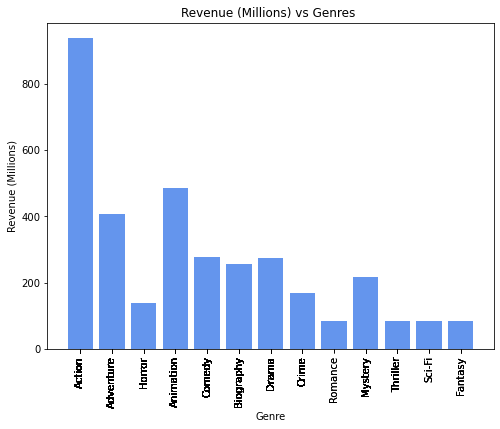

In [19]:
Genres = s_new['Genre']      
height = s_new['Revenue']
plt.figure(figsize=(8,6))
plt.bar(Genres, height, width =0.8, color = ['cornflowerblue'])
plt.xticks(s_new["Genre"], rotation = 90)
plt.xlabel('Genre')
plt.ylabel('Revenue (Millions)')
plt.title('Revenue (Millions) vs Genres ')
plt.show()

In [20]:
l=['Action','Thriller', 'Adventure','Mystery', 'Horror','Fantasy', 'Animation','Sci-Fi', 'Comedy',
       'Biography', 'Drama','Romance', 'Crime']

Box Plot

The box plot is a type of graph that helps visualize the five number summary. The plot doesn't show the distribution in much detail as the histogram does, but it is useful for indicating whether the distribution is skewed and detect potential outliers in the data set. A box plot is ideal for comparing distribution because the center, spread and overal rand are immediately apparent. We can see below the variations in Metasocore among different Genres. Below we can see the metascore and Action distribution is skewed to the left. We can also see metascore for Drama are skewed to the right. We can infer that movie critics favored more for Drama than Action due to numerous type of reasons.

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

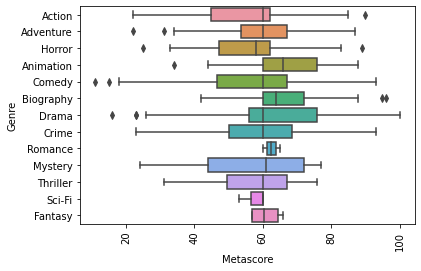

In [21]:
sns.boxplot(x=s_new['Metascore'],y=s_new['Genre'])     
plt.xticks(rotation=90)

Scatter Plot

Scatter plot is a type of data visualization that shows the relationship between different variables. This data is shown by placing various data points between the x-axis and y-axis. Each of the data points scatter around the graph. Below we used number of votes and genre to see if there is a correlation between the two variables. 

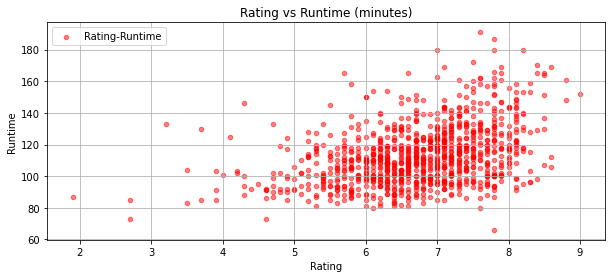

In [22]:
s_new.plot(kind='scatter',x='Rating',y='Runtime',alpha=0.5,color='red',
        figsize=(10,4),
        grid=True,label='Rating-Runtime')
plt.xlabel('Rating')
plt.ylabel('Runtime')
plt.legend()
plt.title('Rating vs Runtime (minutes)')
plt.show()

Heat Map

Heat map is used to show the patterns in the data. Below we are visualising different genres with year.

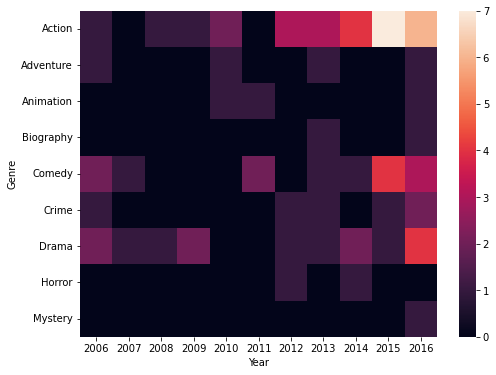

In [23]:
plt.figure(figsize=(8,6))
rand=s_new.sample(75)
h=pd.crosstab(rand["Genre"],rand["Year"])
sns.heatmap(h, annot= False)
plt.show()

Pie Chart

We used a pie chart to to see the comparison between revenue and years. We see that each year, the revenue increases. This could be that more talented actors were shown, production was increased or many more. 

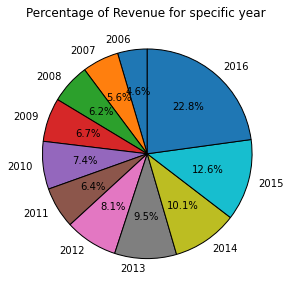

In [24]:
plt.figure(figsize=(12,6))
plt.subplot(1, 3, 1)
s3=s_new.groupby("Year").sum().reset_index()
slices=list(s3["Revenue"])
labels=list(s3.Year)
plt.pie(slices,labels=labels,startangle=90,autopct='%1.1f%%',wedgeprops={'edgecolor':'black'})
plt.title("Percentage of Revenue for specific year ")
plt.tight_layout()

Histogram

A histogram is used for showing the frequencies of distribution of data. It is the graphical distribution of data where the data is grouped into continuous number ranges and each range correspnds to a vertical bar. We selected ratings for 2006 and 2016 to view the frequency of the ratings.

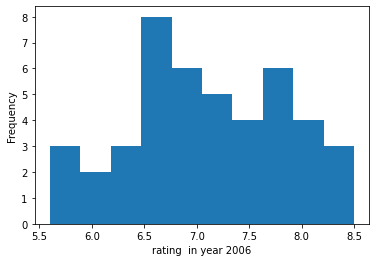

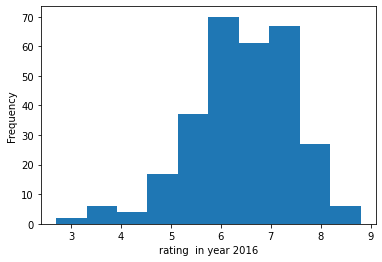

In [26]:
E.Rating.plot(kind = 'hist',bins = 10,figsize = (6,4))
plt.xlabel('rating  in year 2006')
plt.show()

F.Rating.plot(kind = 'hist',bins = 10,figsize = (6,4))
plt.xlabel('rating  in year 2016')
plt.show()

In [25]:
E=s_new[s_new["Year"]==2006]
E

F=s_new[s_new["Year"]==2016]
F

,Rank,Title,Genre,Director,Actor 1,Actor 2,Actor 3,Actor 4,Year,Runtime,Rating,Votes,Revenue,Metascore
2,3,Split,Horror,M. Night Shyamalan,James McAvoy,Anya Taylor-Joy,Haley Lu Richardson,Jessica Sula,2016,117,7.3,157606,138.120000,60.0
3,4,Sing,Animation,Christophe Lourdelet,Matthew McConaughey,Reese Witherspoon,Seth MacFarlane,Scarlett Johansson,2016,108,7.2,60545,270.320000,59.0
4,5,Suicide Squad,Action,David Ayer,Will Smith,Jared Leto,Margot Robbie,Viola Davis,2016,123,6.2,393727,325.020000,40.0
5,6,The Great Wall,Action,Yimou Zhang,Matt Damon,Tian Jing,Willem Dafoe,Andy Lau,2016,103,6.1,56036,45.130000,60.0
6,7,La La Land,Comedy,Damien Chazelle,Ryan Gosling,Emma Stone,Rosemarie DeWitt,J.K. Simmons,2016,128,8.3,258682,151.060000,93.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,976,My Big Fat Greek Wedding 2,Comedy,Kirk Jones,Nia Vardalos,John Corbett,Michael Constantine,Lainie Kazan,2016,94,6.0,20966,59.570000,37.0
977,978,Amateur Night,Comedy,Lisa Addario,Jason Biggs,Janet Montgomery,Ashley Tisdale,Bria L. Murphy,2016,92,5.0,2229,83.465659,38.0
978,979,It's Only the End of the World,Drama,Xavier Dolan,Nathalie Baye,Vincent Cassel,Marion Cotillard,Léa Seydoux,2016,97,7.0,10658,83.465659,48.0
980,981,Miracles from Heaven,Biography,Patricia Riggen,Jennifer Garner,Kylie Rogers,Martin Henderson,Brighton Sharbino,2016,109,7.0,12048,61.690000,44.0


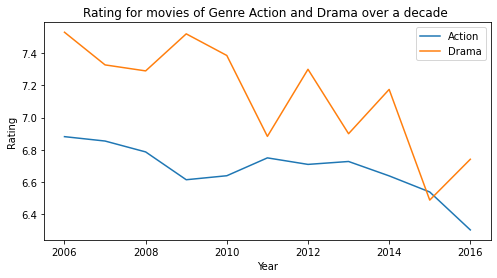

In [27]:
w.filterwarnings('ignore')          
M1 = s_new[s_new.Genre == "Action"]
M2 = s_new[s_new.Genre == "Drama"]
plt.figure(figsize=(8,4))
sns.lineplot(M1.Year, M1.Rating, ci = None)
sns.lineplot(M2.Year, M2.Rating, ci = None)
plt.legend(["Action", 'Drama'])
plt.title('Rating for movies of Genre Action and Drama over a decade ')
plt.show()



The below data visualizations are formed with out imputations on columns Revenue and Metascore

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
import warnings as w
from matplotlib.pyplot import figure
%matplotlib inline

m=pd.read_csv('movier.csv')
m=m[0:1000]
m

,Rank,Title,Genre,Director,Actor 1,Actor 2,Actor 3,Actor 4,Year,Runtime,Rating,Votes,Revenue,Metascore
0,1,Guardians of the Galaxy,Action,James Gunn,Chris Pratt,Vin Diesel,Bradley Cooper,Zoe Saldana,2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,Adventure,Ridley Scott,Noomi Rapace,Logan Marshall-Green,Michael Fassbender,Charlize Theron,2012,124,7.0,485820,126.46,65.0
2,3,Split,Horror,M. Night Shyamalan,James McAvoy,Anya Taylor-Joy,Haley Lu Richardson,Jessica Sula,2016,117,7.3,157606,138.12,NaN
3,4,Sing,Animation,Christophe Lourdelet,Matthew McConaughey,Reese Witherspoon,Seth MacFarlane,Scarlett Johansson,2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,Action,David Ayer,Will Smith,Jared Leto,Margot Robbie,Viola Davis,2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,Crime,Billy Ray,Chiwetel Ejiofor,Nicole Kidman,Julia Roberts,Dean Norris,2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Eli Roth,Lauren German,Heather Matarazzo,Bijou Phillips,Roger Bart,2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,Drama,Jon M. Chu,Robert Hoffman,Briana Evigan,Cassie Ventura,Adam G. Sevani,2008,98,6.2,70699,58.01,50.0
998,999,Search Party,Adventure,Scot Armstrong,Adam Pally,T.J. Miller,Thomas Middleditch,Shannon Woodward,2014,93,5.6,4881,NaN,22.0


<AxesSubplot:>

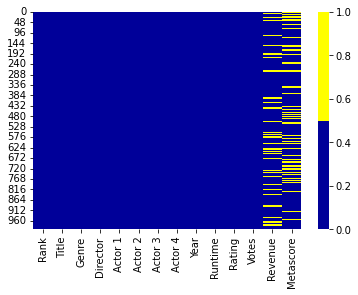

In [29]:
cols = m.columns[:1000] 
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(m[cols].isnull(), cmap=sns.color_palette(colours))

In [30]:
m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Rank       1000 non-null   int64  
 1   Title      1000 non-null   object 
 2   Genre      1000 non-null   object 
 3   Director   1000 non-null   object 
 4   Actor 1    1000 non-null   object 
 5   Actor 2    1000 non-null   object 
 6   Actor 3    1000 non-null   object 
 7   Actor 4    999 non-null    object 
 8   Year       1000 non-null   int64  
 9   Runtime    1000 non-null   int64  
 10  Rating     1000 non-null   float64
 11  Votes      1000 non-null   int64  
 12  Revenue    850 non-null    float64
 13  Metascore  793 non-null    float64
dtypes: float64(3), int64(4), object(7)
memory usage: 109.5+ KB


The below code represents the number of missing values in specific column in the dataset

In [31]:
m.isna().sum()

Rank           0
Title          0
Genre          0
Director       0
Actor 1        0
Actor 2        0
Actor 3        0
Actor 4        1
Year           0
Runtime        0
Rating         0
Votes          0
Revenue      150
Metascore    207
dtype: int64

In [32]:
print(m.columns)

Index(['Rank', 'Title', 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3',
       'Actor 4', 'Year', 'Runtime', 'Rating', 'Votes', 'Revenue',
       'Metascore'],
      dtype='object')


In [33]:
Genres=['Action', 'Adventure', 'Horror', 'Animation', 'Comedy',
       'Biography', 'Drama', 'Crime', 'Romance', 'Mystery', 'Thriller',
       'Sci-Fi', 'Fantasy', 'Comedyal']

In [34]:
s.Genre.unique()

array(['Action', 'Adventure', 'Horror', 'Animation', 'Comedy',
       'Biography', 'Drama', 'Crime', 'Romance', 'Mystery', 'Thriller',
       'Sci-Fi', 'Fantasy'], dtype=object)

In [35]:
m_new=m[m.Genre.isin(Genres)]
m_new

,Rank,Title,Genre,Director,Actor 1,Actor 2,Actor 3,Actor 4,Year,Runtime,Rating,Votes,Revenue,Metascore
0,1,Guardians of the Galaxy,Action,James Gunn,Chris Pratt,Vin Diesel,Bradley Cooper,Zoe Saldana,2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,Adventure,Ridley Scott,Noomi Rapace,Logan Marshall-Green,Michael Fassbender,Charlize Theron,2012,124,7.0,485820,126.46,65.0
2,3,Split,Horror,M. Night Shyamalan,James McAvoy,Anya Taylor-Joy,Haley Lu Richardson,Jessica Sula,2016,117,7.3,157606,138.12,NaN
3,4,Sing,Animation,Christophe Lourdelet,Matthew McConaughey,Reese Witherspoon,Seth MacFarlane,Scarlett Johansson,2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,Action,David Ayer,Will Smith,Jared Leto,Margot Robbie,Viola Davis,2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,Crime,Billy Ray,Chiwetel Ejiofor,Nicole Kidman,Julia Roberts,Dean Norris,2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Eli Roth,Lauren German,Heather Matarazzo,Bijou Phillips,Roger Bart,2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,Drama,Jon M. Chu,Robert Hoffman,Briana Evigan,Cassie Ventura,Adam G. Sevani,2008,98,6.2,70699,58.01,50.0
998,999,Search Party,Adventure,Scot Armstrong,Adam Pally,T.J. Miller,Thomas Middleditch,Shannon Woodward,2014,93,5.6,4881,NaN,22.0


The below bargraph is between Revenue and Genre .Here the visualiztion is done with missing values from Column Genre.Imputations performed on Revenue variable using Mean.
We can see that Thriller Genre has very low revenue which is not appeared on the non imputed bar graph.
However, Using statistical approach for filling values we can see Thriller has the lowest Revenue along with Sci-Fi, Fantasy and Romance.


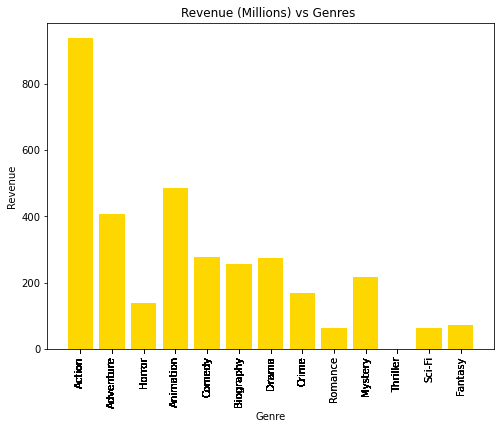

In [36]:
Genres = m_new['Genre']      
height = m_new['Revenue']
plt.figure(figsize=(8,6))
plt.bar(Genres, height, width =0.8, color = ['Gold'])
plt.xticks(m_new["Genre"], rotation = 90)
plt.xlabel('Genre')
plt.ylabel('Revenue')
plt.title('Revenue (Millions) vs Genres ')
plt.show()

The bargraph below is the graph without imputations and it has missing values in it.Imputations are performed on “Meta score” using mode.
Before imputation we can notice that values are spread over the graph.
However, after imputations almost all Genre values are scattered around median which explains data accuracy and data quality. 


(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

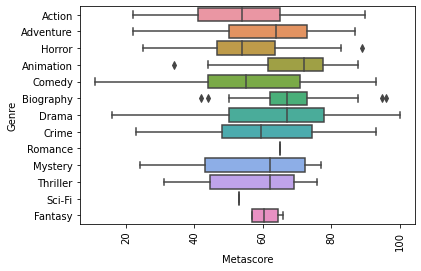

In [39]:
sns.boxplot(x=m_new['Metascore'],y=m_new['Genre'])     
plt.xticks(rotation=90)